# 手書き数字認識

機械学習で問題を解くときは、「学習」と「推論」の2つのフェーズで行います。  
ニューラルネットワークでは、「学習」は「訓練データ(学習データ)」を使用して重みパラメーターの学習を行い、「推論」では学習した重みパラメーターを使って、入力データの分類を行います。

## MNISTデータセット

今回は、MNISTデータセット (えむにすと)と呼ばれる、機械学習の分野で最も有名なデータを使います。

MNISTデータセットは、0から9までの数字画像から構成されています。

* 28 x 28のグレー画像 (1チャンネル)
* 1ピクセルに 0 ~ 255 までの値

## データを表示してみる

label:  5
img.shape:  (784,)
img.shape:  (28, 28)


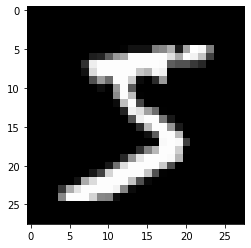

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'sample')))

import numpy as np
from dataset.mnist import load_mnist # サンプルにあるPythonモジュール
from PIL import Image
import matplotlib.pyplot as plt


def img_show(img):
    '''
    NumPy用になっているデータをPIL用イメージ画像に変換して、表示します
    '''
    pil_img = Image.fromarray(np.uint8(img))
    # pil_img.show()
    plt.imshow(pil_img, cmap='gray')

# load_mnist で読み込む
# (訓練画像、訓練ラベル), (テスト画像, テストラベル) という形式で MNISTデータを返す
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 訓練画像と訓練ラベルを取り出す
img = x_train[0]
label = t_train[0]
print("label: ", label)

# 訓練画像は flatten=True…データを1次元配列にしている
print("img.shape: ", img.shape)

# 形状を元の画像サイズに変形
img = img.reshape(28, 28) 
print("img.shape: ", img.shape)

# 画像を表示する
img_show(img)

## ニューラルネットワークの推論処理

* 入力層は784
    * 画像の大きさ$28 \times 28 = 784$より
* 出力層は10
    * 0 ~ 9 の数字を出すため

* 隠れ層は2つ、一つは50, もう一つは100
    * 任意の値で設定可能

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'sample')))
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    # 正規化されたデータとして前処理を行う
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open(os.path.abspath(os.path.join('..', 'sample', 'ch03', "sample_weight.pkl")), 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


# MNIST データセットの取得
x, t = get_data()

# ニューラルネットワークの構築
network = init_network()

# MNISTデータの画像を分類し
# 確率の高いものを予測結果に入れる
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

# ニューラルネットワークの認識制度
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


## バッチ処理

* 入力データを複数にまとめて、一度に計算させる
* 一つ一つ計算するよりは高速化が可能
* まとまった入力データを「バッチ」という
* バッチが多いと逆に遅くなったり、そもそもメモリが足りなくなったりする場合もあるので、必ずバッチ処理をしなければならない、というわけではない

In [3]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
